In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.7 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import itertools as iter
from random import sample
from itertools import chain 
import csv
import glob
import os
from numpy.random import poisson #import
import pickle
import scipy
from scipy import stats
from functools import reduce
import operator
from numpy.random import randint
import matplotlib

In [ ]:
from graph_tool.all import *
import graph_tool.all as gt 

In [ ]:
#pip install EoN
#import EoN

In [ ]:
# https://graph-tool.skewed.de/static/doc/draw.html?highlight=vertex%20list 
# https://graph-tool.skewed.de/static/doc/quickstart.html

In [ ]:
# Load Edge Data and ISO Code
mea = pd.read_csv('/content/drive/MyDrive/G11-MEA-Diffusion/dataMEA_Ctrlity/MEA_v1.1_2000_2020_toMerge.csv') #all MEAs from 2000 to 2020
iso = pd.read_csv('/content/drive/MyDrive/G11-MEA-Diffusion/dataMEA_Ctrlity/MEA_v1.2_MEA_ISO_crosswalk.csv') #iso country code 

In [ ]:
# Merging data 
frame = [mea, iso]
mea_iso_merged = reduce(lambda left,right: pd.merge(left, right, on=['Country'],
                                            how='inner'), frame).fillna('0')

# Exporting data

#mea_iso_merged.to_csv('/content/drive/MyDrive/G11-MEA-Diffusion/dataMEA_Ctrlity/MEA_ISO_Merged.csv')

In [ ]:
# MEA_2000-2008
mea_2000_2008 = mea_iso_merged[mea_iso_merged["Year"] < 2009]

# MEA_2003-2011
mea_2003_2011 = mea_iso_merged[2002 < mea_iso_merged["Year"]]
mea_2003_2011 = mea_2003_2011[mea_2003_2011["Year"] < 2012]

# MEA 2005-2013
mea_2005_2013 = mea_iso_merged[2004 < mea_iso_merged["Year"]]
mea_2005_2013 = mea_2005_2013[mea_2005_2013["Year"] < 2014]

# MEA 2007-2015
mea_2007_2015 = mea_iso_merged[2006 < mea_iso_merged["Year"]]
mea_2007_2015 = mea_2007_2015[mea_2007_2015["Year"] < 2016]

# MEA 2010-2018
mea_2010_2018 = mea_iso_merged[2009 < mea_iso_merged["Year"]]
mea_2010_2018 = mea_2010_2018[mea_2010_2018["Year"] < 2019]

In [ ]:
# Generate Graphs 
G_2000_2008 = nx.convert_matrix.from_pandas_edgelist(mea_2000_2008, source='Ctry_Code', target='iea')
G_2003_2011 = nx.convert_matrix.from_pandas_edgelist(mea_2003_2011, source='Ctry_Code', target='iea')
G_2005_2013 = nx.convert_matrix.from_pandas_edgelist(mea_2005_2013, source='Ctry_Code', target='iea')
G_2007_2015 = nx.convert_matrix.from_pandas_edgelist(mea_2007_2015, source='Ctry_Code', target='iea')
G_2010_2018 = nx.convert_matrix.from_pandas_edgelist(mea_2010_2018, source='Ctry_Code', target='iea')

In [ ]:
# Vertex data
vertex = pd.read_csv('/content/drive/MyDrive/G11-MEA-Diffusion/dataMEA_Ctrlity/mea_vertex_final_5352.csv')
node_attr = vertex.set_index('node').to_dict('index') #https://stackoverflow.com/questions/54497929/networkx-setting-node-attributes-from-dataframe/54662176 

# Bipartite classification attached to each graph 
nx.set_node_attributes(G_2000_2008, node_attr)
nx.set_node_attributes(G_2003_2011, node_attr)
nx.set_node_attributes(G_2005_2013, node_attr)
nx.set_node_attributes(G_2007_2015, node_attr)
nx.set_node_attributes(G_2010_2018, node_attr)

In [ ]:
# One-mode projection of countries 

# 2000_2008 for 2009 data
top_nodes = {n for n, d in G_2000_2008.nodes(data=True) if G_2000_2008.nodes[n]['bipartite'] == 1}
bottom_nodes = {n for n, d in G_2000_2008.nodes(data=True) if G_2000_2008.nodes[n]['bipartite'] == 0}
C_2000_2008 = bipartite.projected_graph(G_2000_2008, top_nodes)

# 2003-2011 for 2012 data
top_nodes = {n for n, d in G_2003_2011.nodes(data=True) if G_2003_2011.nodes[n]['bipartite'] == 1}
bottom_nodes = {n for n, d in G_2003_2011.nodes(data=True) if G_2003_2011.nodes[n]['bipartite'] == 0}
C_2003_2011 = bipartite.projected_graph(G_2003_2011, top_nodes)

# 2005-2013 for 2014 data
top_nodes = {n for n, d in G_2005_2013.nodes(data=True) if G_2005_2013.nodes[n]['bipartite'] == 1}
bottom_nodes = {n for n, d in G_2005_2013.nodes(data=True) if G_2005_2013.nodes[n]['bipartite'] == 0}
C_2005_2013 = bipartite.projected_graph(G_2005_2013, top_nodes)

# 2007-2015 for 2016 data
top_nodes = {n for n, d in G_2007_2015.nodes(data=True) if G_2007_2015.nodes[n]['bipartite'] == 1}
bottom_nodes = {n for n, d in G_2007_2015.nodes(data=True) if G_2007_2015.nodes[n]['bipartite'] == 0}
C_2007_2015 = bipartite.projected_graph(G_2007_2015, top_nodes)

# 2010-2018 for 2019 data
top_nodes = {n for n, d in G_2010_2018.nodes(data=True) if G_2010_2018.nodes[n]['bipartite'] == 1}
bottom_nodes = {n for n, d in G_2010_2018.nodes(data=True) if G_2010_2018.nodes[n]['bipartite'] == 0}
C_2010_2018 = bipartite.projected_graph(G_2010_2018, top_nodes)



In [ ]:
# Create separate graphs for each centrality measure (for future use)

C_2000_2008_eigenvec = C_2000_2008
C_2000_2008_harmnic = C_2000_2008
C_2000_2008_btwness = C_2000_2008
C_2000_2008_sprding = C_2000_2008

C_2003_2011_eigenvec = C_2003_2011
C_2003_2011_harmnic = C_2003_2011
C_2003_2011_btwness = C_2003_2011
C_2003_2011_sprding = C_2003_2011

C_2005_2013_eigenvec = C_2005_2013
C_2005_2013_harmnic = C_2005_2013
C_2005_2013_btwness = C_2005_2013
C_2005_2013_sprding = C_2005_2013

C_2007_2015_eigenvec = C_2007_2015
C_2007_2015_harmnic = C_2007_2015
C_2007_2015_btwness = C_2007_2015
C_2007_2015_sprding = C_2007_2015

C_2010_2018_eigenvec = C_2010_2018
C_2010_2018_harmnic = C_2010_2018
C_2010_2018_btwness = C_2010_2018
C_2010_2018_sprding = C_2010_2018

In [ ]:
# graph-tool conversions 
C_2010_2018_gt = C_2010_2018
nx.write_graphml_lxml(C_2010_2018_gt, "mea_2018_gt.graphml")
gt_2018_univ = graph_tool.load_graph("mea_2018_gt.graphml", fmt='auto', ignore_vp=None, ignore_ep=None, ignore_gp=None)

# extra
C_2010_2018_eigenvec_gt = C_2010_2018
C_2010_2018_harmnic_gt = C_2010_2018

# Eigenvector centrality graph-tool 
nx.write_graphml_lxml(C_2010_2018_eigenvec_gt, "mea_eigen_ctrlty_2018_gt.graphml")
gt_eigen_2018_new = graph_tool.load_graph("mea_eigen_ctrlty_2018_gt.graphml", fmt='auto', ignore_vp=None, ignore_ep=None, ignore_gp=None)

# harmonic centrality graph-tool 
nx.write_graphml_lxml(C_2010_2018_harmnic_gt, "mea_harmnic_ctrlty_2018_gt.graphml")
gt_harmnic_2018_new = graph_tool.load_graph("mea_harmnic_ctrlty_2018_gt.graphml", fmt='auto', ignore_vp=None, ignore_ep=None, ignore_gp=None)


In [ ]:
# Eigenvector centrality

eigen_cent_2000_2008 = nx.algorithms.centrality.eigenvector_centrality(C_2000_2008)
eigen_cent_2003_2011 = nx.algorithms.centrality.eigenvector_centrality(C_2003_2011)
eigen_cent_2005_2013 = nx.algorithms.centrality.eigenvector_centrality(C_2005_2013)
eigen_cent_2007_2015 = nx.algorithms.centrality.eigenvector_centrality(C_2007_2015)
eigen_cent_2010_2018 = nx.algorithms.centrality.eigenvector_centrality(C_2010_2018)

sorted_eigen_2000_2008 = dict(sorted(eigen_cent_2000_2008.items(), key=operator.itemgetter(1),reverse=True))
sorted_eigen_2003_2011 = dict(sorted(eigen_cent_2003_2011.items(), key=operator.itemgetter(1),reverse=True))
sorted_eigen_2005_2013 = dict(sorted(eigen_cent_2005_2013.items(), key=operator.itemgetter(1),reverse=True))
sorted_eigen_2007_2015 = dict(sorted(eigen_cent_2007_2015.items(), key=operator.itemgetter(1),reverse=True))
sorted_eigen_2010_2018 = dict(sorted(eigen_cent_2010_2018.items(), key=operator.itemgetter(1),reverse=True))
#list_eigen = [(k, v) for k, v in sorted_eigen.items()] 
#list_eigen

df_eigen_2008 = pd.DataFrame(list(sorted_eigen_2000_2008.items()),columns = ['ctry','eigenvector_centrality'])
df_eigen_2011 = pd.DataFrame(list(sorted_eigen_2003_2011.items()),columns = ['ctry','eigenvector_centrality'])
df_eigen_2013 = pd.DataFrame(list(sorted_eigen_2005_2013.items()),columns = ['ctry','eigenvector_centrality'])
df_eigen_2015 = pd.DataFrame(list(sorted_eigen_2007_2015.items()),columns = ['ctry','eigenvector_centrality'])
df_eigen_2018 = pd.DataFrame(list(sorted_eigen_2010_2018.items()),columns = ['ctry','eigenvector_centrality'])

df_eigen_2008['eigenvector_centrality'] = df_eigen_2008['eigenvector_centrality']*10
df_eigen_2011['eigenvector_centrality'] = df_eigen_2011['eigenvector_centrality']*10
df_eigen_2013['eigenvector_centrality'] = df_eigen_2013['eigenvector_centrality']*10
df_eigen_2015['eigenvector_centrality'] = df_eigen_2015['eigenvector_centrality']*10
df_eigen_2018['eigenvector_centrality'] = df_eigen_2018['eigenvector_centrality']*10

df_eigen_2008['stad_eigenvector'] = (df_eigen_2008['eigenvector_centrality'] - df_eigen_2008['eigenvector_centrality'].mean())/df_eigen_2008['eigenvector_centrality'].std()
df_eigen_2011['stad_eigenvector'] = (df_eigen_2011['eigenvector_centrality'] - df_eigen_2011['eigenvector_centrality'].mean())/df_eigen_2011['eigenvector_centrality'].std()
df_eigen_2013['stad_eigenvector'] = (df_eigen_2013['eigenvector_centrality'] - df_eigen_2013['eigenvector_centrality'].mean())/df_eigen_2013['eigenvector_centrality'].std()
df_eigen_2015['stad_eigenvector'] = (df_eigen_2015['eigenvector_centrality'] - df_eigen_2015['eigenvector_centrality'].mean())/df_eigen_2015['eigenvector_centrality'].std()
df_eigen_2018['stad_eigenvector'] = (df_eigen_2018['eigenvector_centrality'] - df_eigen_2018['eigenvector_centrality'].mean())/df_eigen_2018['eigenvector_centrality'].std()

df_eigen_2008['year'] = 2009 
df_eigen_2011['year'] = 2012
df_eigen_2013['year'] = 2014
df_eigen_2015['year'] = 2016
df_eigen_2018['year'] = 2019

In [ ]:
# Harmonic centrality

harmnic_cent_2000_2008 = nx.algorithms.centrality.harmonic_centrality(C_2000_2008)
harmnic_cent_2003_2011 = nx.algorithms.centrality.harmonic_centrality(C_2003_2011)
harmnic_cent_2005_2013 = nx.algorithms.centrality.harmonic_centrality(C_2005_2013)
harmnic_cent_2007_2015 = nx.algorithms.centrality.harmonic_centrality(C_2007_2015)
harmnic_cent_2010_2018 = nx.algorithms.centrality.harmonic_centrality(C_2010_2018)

sorted_harmnic_2000_2008 = dict(sorted(harmnic_cent_2000_2008.items(), key=operator.itemgetter(1),reverse=True))
sorted_harmnic_2003_2011 = dict(sorted(harmnic_cent_2003_2011.items(), key=operator.itemgetter(1),reverse=True))
sorted_harmnic_2005_2013 = dict(sorted(harmnic_cent_2005_2013.items(), key=operator.itemgetter(1),reverse=True))
sorted_harmnic_2007_2015 = dict(sorted(harmnic_cent_2007_2015.items(), key=operator.itemgetter(1),reverse=True))
sorted_harmnic_2010_2018 = dict(sorted(harmnic_cent_2010_2018.items(), key=operator.itemgetter(1),reverse=True))
#list_harmnic = [(k, v) for k, v in sorted_harmnic.items()] 
#list_harmnic

df_harmnic_2008 = pd.DataFrame(list(sorted_harmnic_2000_2008.items()),columns = ['ctry','harmonic_centrality'])
df_harmnic_2011 = pd.DataFrame(list(sorted_harmnic_2003_2011.items()),columns = ['ctry','harmonic_centrality'])
df_harmnic_2013 = pd.DataFrame(list(sorted_harmnic_2005_2013.items()),columns = ['ctry','harmonic_centrality'])
df_harmnic_2015 = pd.DataFrame(list(sorted_harmnic_2007_2015.items()),columns = ['ctry','harmonic_centrality'])
df_harmnic_2018 = pd.DataFrame(list(sorted_harmnic_2010_2018.items()),columns = ['ctry','harmonic_centrality'])

#df_harmnic_2008['harmonic_centrality'] = df_harmnic_2008['harmonic_centrality']*10
#df_harmnic_2011['harmonic_centrality'] = df_harmnic_2011['harmonic_centrality']*10
#df_harmnic_2013['harmonic_centrality'] = df_harmnic_2013['harmonic_centrality']*10
#df_harmnic_2015['harmonic_centrality'] = df_harmnic_2015['harmonic_centrality']*10
#df_harmnic_2018['harmonic_centrality'] = df_harmnic_2018['harmonic_centrality']*10

df_harmnic_2008['stad_harmonic'] = (df_harmnic_2008['harmonic_centrality'] - df_harmnic_2008['harmonic_centrality'].mean())/df_harmnic_2008['harmonic_centrality'].std()
df_harmnic_2011['stad_harmonic'] = (df_harmnic_2011['harmonic_centrality'] - df_harmnic_2011['harmonic_centrality'].mean())/df_harmnic_2011['harmonic_centrality'].std()
df_harmnic_2013['stad_harmonic'] = (df_harmnic_2013['harmonic_centrality'] - df_harmnic_2013['harmonic_centrality'].mean())/df_harmnic_2013['harmonic_centrality'].std()
df_harmnic_2015['stad_harmonic'] = (df_harmnic_2015['harmonic_centrality'] - df_harmnic_2015['harmonic_centrality'].mean())/df_harmnic_2015['harmonic_centrality'].std()
df_harmnic_2018['stad_harmonic'] = (df_harmnic_2018['harmonic_centrality'] - df_harmnic_2018['harmonic_centrality'].mean())/df_harmnic_2018['harmonic_centrality'].std()

df_harmnic_2008['year'] = 2009 
df_harmnic_2011['year'] = 2012
df_harmnic_2013['year'] = 2014
df_harmnic_2015['year'] = 2016
df_harmnic_2018['year'] = 2019

In [ ]:
# Betweenness centrality

betweenness_cent_2000_2008 = nx.algorithms.centrality.betweenness_centrality(C_2000_2008)
betweenness_cent_2003_2011 = nx.algorithms.centrality.betweenness_centrality(C_2003_2011)
betweenness_cent_2005_2013 = nx.algorithms.centrality.betweenness_centrality(C_2005_2013)
betweenness_cent_2007_2015 = nx.algorithms.centrality.betweenness_centrality(C_2007_2015)
betweenness_cent_2010_2018 = nx.algorithms.centrality.betweenness_centrality(C_2010_2018)

sorted_betweenness_2000_2008 = dict(sorted(betweenness_cent_2000_2008.items(), key=operator.itemgetter(1),reverse=True))
sorted_betweenness_2003_2011 = dict(sorted(betweenness_cent_2003_2011.items(), key=operator.itemgetter(1),reverse=True))
sorted_betweenness_2005_2013 = dict(sorted(betweenness_cent_2005_2013.items(), key=operator.itemgetter(1),reverse=True))
sorted_betweenness_2007_2015 = dict(sorted(betweenness_cent_2007_2015.items(), key=operator.itemgetter(1),reverse=True))
sorted_betweenness_2010_2018 = dict(sorted(betweenness_cent_2010_2018.items(), key=operator.itemgetter(1),reverse=True))
#list_betweenness = [(k, v) for k, v in sorted_betweenness.items()] 
#list_betweenness

df_betweenness_2008 = pd.DataFrame(list(sorted_betweenness_2000_2008.items()),columns = ['ctry','betweenness_centrality'])
df_betweenness_2011 = pd.DataFrame(list(sorted_betweenness_2003_2011.items()),columns = ['ctry','betweenness_centrality'])
df_betweenness_2013 = pd.DataFrame(list(sorted_betweenness_2005_2013.items()),columns = ['ctry','betweenness_centrality'])
df_betweenness_2015 = pd.DataFrame(list(sorted_betweenness_2007_2015.items()),columns = ['ctry','betweenness_centrality'])
df_betweenness_2018 = pd.DataFrame(list(sorted_betweenness_2010_2018.items()),columns = ['ctry','betweenness_centrality'])

#df_betweenness_2008['betweenness_centrality'] = df_betweenness_2008['betweenness_centrality']*10
#df_betweenness_2011['betweenness_centrality'] = df_betweenness_2011['betweenness_centrality']*10
#df_betweenness_2013['betweenness_centrality'] = df_betweenness_2013['betweenness_centrality']*10
#df_betweenness_2015['betweenness_centrality'] = df_betweenness_2015['betweenness_centrality']*10
#df_betweenness_2018['betweenness_centrality'] = df_betweenness_2018['betweenness_centrality']*10

df_betweenness_2008['stad_betweenness'] = (df_betweenness_2008['betweenness_centrality'] - df_betweenness_2008['betweenness_centrality'].mean())/df_betweenness_2008['betweenness_centrality'].std()
df_betweenness_2011['stad_betweenness'] = (df_betweenness_2011['betweenness_centrality'] - df_betweenness_2011['betweenness_centrality'].mean())/df_betweenness_2011['betweenness_centrality'].std()
df_betweenness_2013['stad_betweenness'] = (df_betweenness_2013['betweenness_centrality'] - df_betweenness_2013['betweenness_centrality'].mean())/df_betweenness_2013['betweenness_centrality'].std()
df_betweenness_2015['stad_betweenness'] = (df_betweenness_2015['betweenness_centrality'] - df_betweenness_2015['betweenness_centrality'].mean())/df_betweenness_2015['betweenness_centrality'].std()
df_betweenness_2018['stad_betweenness'] = (df_betweenness_2018['betweenness_centrality'] - df_betweenness_2018['betweenness_centrality'].mean())/df_betweenness_2018['betweenness_centrality'].std()

df_betweenness_2008['year'] = 2009 
df_betweenness_2011['year'] = 2012
df_betweenness_2013['year'] = 2014
df_betweenness_2015['year'] = 2016
df_betweenness_2018['year'] = 2019

In [ ]:
# Degree centrality

degree_cent_2000_2008 = nx.algorithms.centrality.degree_centrality(C_2000_2008)
degree_cent_2003_2011 = nx.algorithms.centrality.degree_centrality(C_2003_2011)
degree_cent_2005_2013 = nx.algorithms.centrality.degree_centrality(C_2005_2013)
degree_cent_2007_2015 = nx.algorithms.centrality.degree_centrality(C_2007_2015)
degree_cent_2010_2018 = nx.algorithms.centrality.degree_centrality(C_2010_2018)

sorted_degree_2000_2008 = dict(sorted(degree_cent_2000_2008.items(), key=operator.itemgetter(1),reverse=True))
sorted_degree_2003_2011 = dict(sorted(degree_cent_2003_2011.items(), key=operator.itemgetter(1),reverse=True))
sorted_degree_2005_2013 = dict(sorted(degree_cent_2005_2013.items(), key=operator.itemgetter(1),reverse=True))
sorted_degree_2007_2015 = dict(sorted(degree_cent_2007_2015.items(), key=operator.itemgetter(1),reverse=True))
sorted_degree_2010_2018 = dict(sorted(degree_cent_2010_2018.items(), key=operator.itemgetter(1),reverse=True))
#list_degree = [(k, v) for k, v in sorted_degree.items()] 
#list_degree

df_degree_2008 = pd.DataFrame(list(sorted_degree_2000_2008.items()),columns = ['ctry','degree_centrality'])
df_degree_2011 = pd.DataFrame(list(sorted_degree_2003_2011.items()),columns = ['ctry','degree_centrality'])
df_degree_2013 = pd.DataFrame(list(sorted_degree_2005_2013.items()),columns = ['ctry','degree_centrality'])
df_degree_2015 = pd.DataFrame(list(sorted_degree_2007_2015.items()),columns = ['ctry','degree_centrality'])
df_degree_2018 = pd.DataFrame(list(sorted_degree_2010_2018.items()),columns = ['ctry','degree_centrality'])

#df_degree_2008['degree_centrality'] = df_degree_2008['degree_centrality']*10
#df_degree_2011['degree_centrality'] = df_degree_2011['degree_centrality']*10
#df_degree_2013['degree_centrality'] = df_degree_2013['degree_centrality']*10
#df_degree_2015['degree_centrality'] = df_degree_2015['degree_centrality']*10
#df_degree_2018['degree_centrality'] = df_degree_2018['degree_centrality']*10

df_degree_2008['stad_degree'] = (df_degree_2008['degree_centrality'] - df_degree_2008['degree_centrality'].mean())/df_degree_2008['degree_centrality'].std()
df_degree_2011['stad_degree'] = (df_degree_2011['degree_centrality'] - df_degree_2011['degree_centrality'].mean())/df_degree_2011['degree_centrality'].std()
df_degree_2013['stad_degree'] = (df_degree_2013['degree_centrality'] - df_degree_2013['degree_centrality'].mean())/df_degree_2013['degree_centrality'].std()
df_degree_2015['stad_degree'] = (df_degree_2015['degree_centrality'] - df_degree_2015['degree_centrality'].mean())/df_degree_2015['degree_centrality'].std()
df_degree_2018['stad_degree'] = (df_degree_2018['degree_centrality'] - df_degree_2018['degree_centrality'].mean())/df_degree_2018['degree_centrality'].std()

df_degree_2008['year'] = 2009 
df_degree_2011['year'] = 2012
df_degree_2013['year'] = 2014
df_degree_2015['year'] = 2016
df_degree_2018['year'] = 2019

In [ ]:
df_eigen_centrality = df_eigen_2008.append([df_eigen_2011, df_eigen_2013, df_eigen_2015, df_eigen_2018])

In [ ]:
df_harmnic_centrality = df_harmnic_2008.append([df_harmnic_2011, df_harmnic_2013, df_harmnic_2015, df_harmnic_2018])

In [ ]:
df_betweenness_centrality = df_betweenness_2008.append([df_betweenness_2011, df_betweenness_2013, df_betweenness_2015, df_betweenness_2018])

In [ ]:
df_degree_centrality = df_degree_2008.append([df_degree_2011, df_degree_2013, df_degree_2015, df_degree_2018])

In [ ]:
# Merging data 
ctrlity_frame = [df_eigen_centrality, df_harmnic_centrality, df_betweenness_centrality, df_degree_centrality]
ctrlity_merged = reduce(lambda left,right: pd.merge(left, right, on=['ctry', 'year'],
                                            how='inner'), ctrlity_frame).fillna('0')

ctrlity_merged.to_csv("/content/drive/MyDrive/G11-MEA-Diffusion/dataMEA_Ctrlity/ctrlity_output.csv")

### visualization

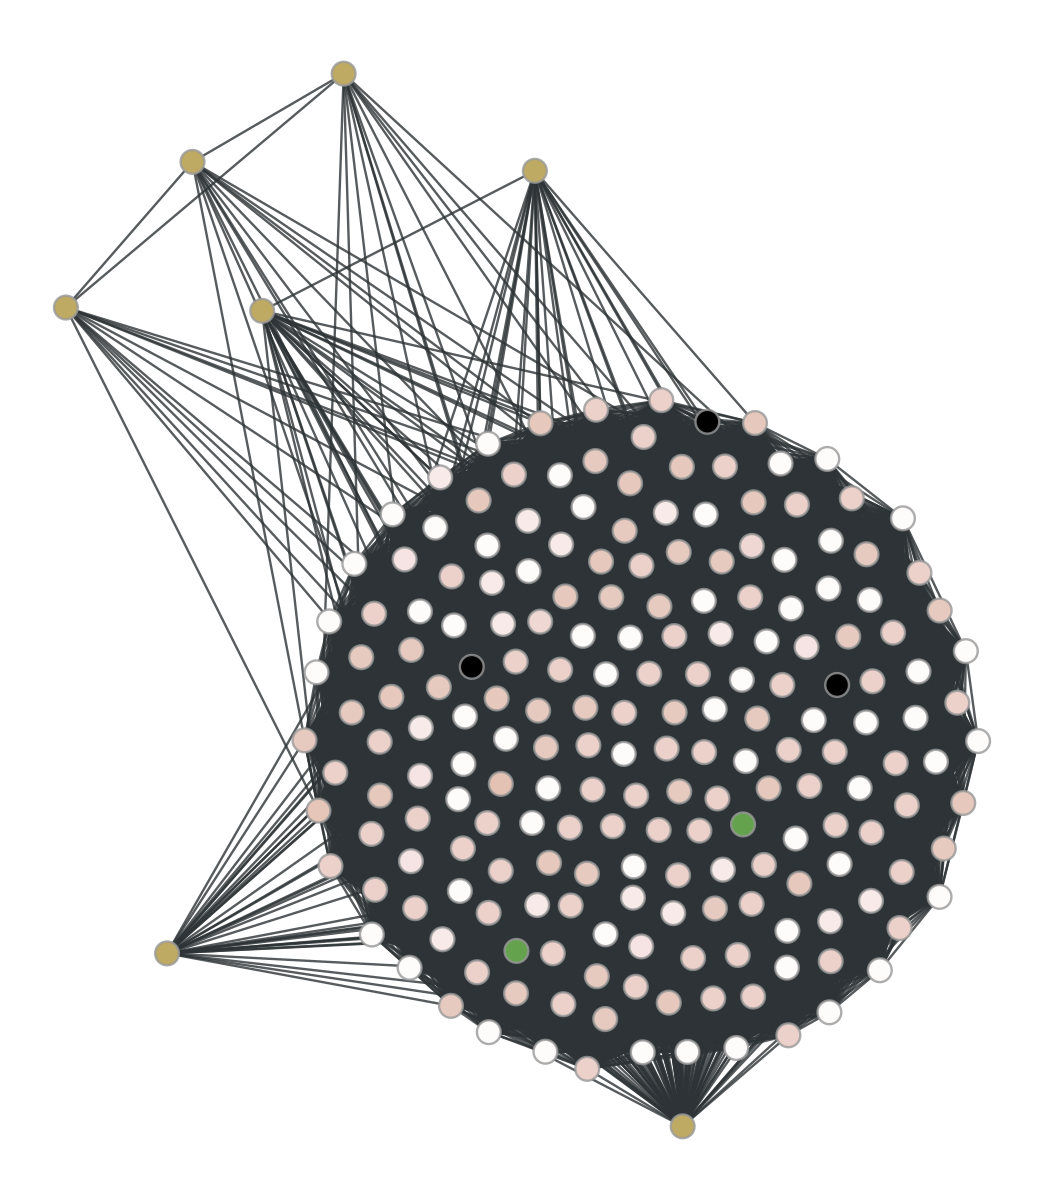

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fac0e98f780, at 0x7fac0a7cb048>

In [ ]:
#eigenvector centrality

ee, x = gt.eigenvector(gt_2018_univ)
#x.a /= x.a.max() / 5
#x.a = (x.a + 4.3)**2.8
x.a /= (x.a*10 - 0.7)/0.04 # follow the formula in the book 
gt.graph_draw(gt_2018_univ, vertex_fill_color=x, vcmap=matplotlib.cm.gist_earth, vorder=x) #

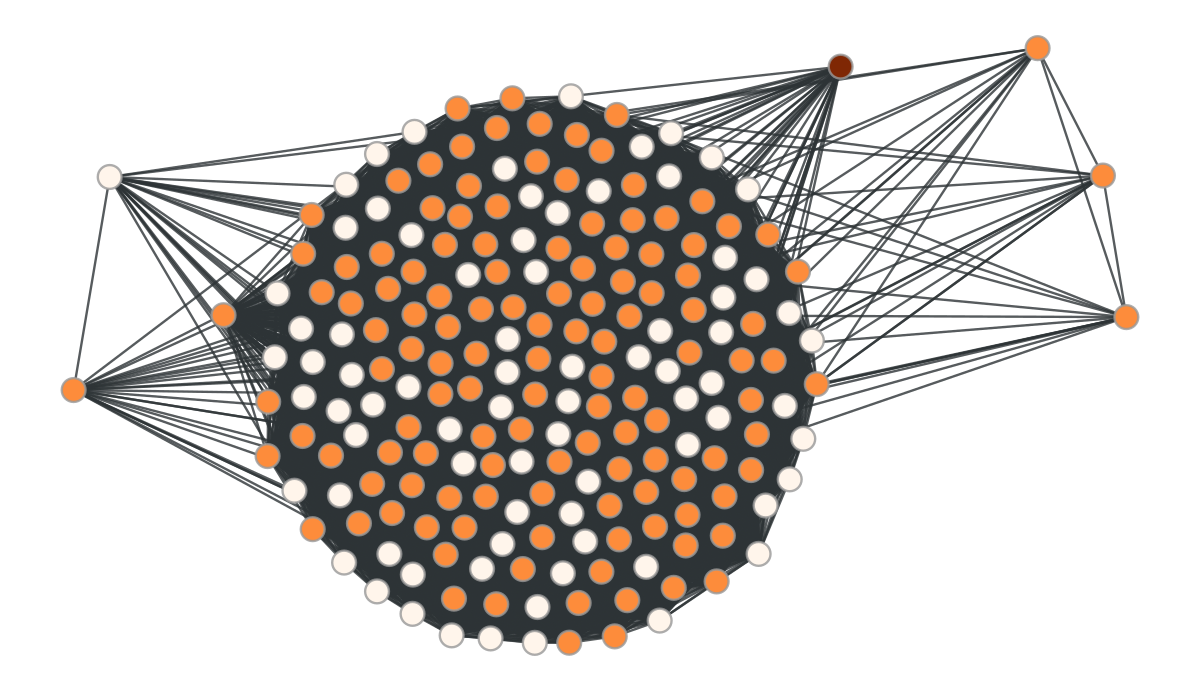

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fac0ec1a160, at 0x7fac0ed206d8>

In [ ]:
gc = gt.GraphView(gt_2018_univ, vfilt=gt.label_largest_component(gt_2018_univ))
c = gt.closeness(gc)
c.a /= c.a / 232
gt.graph_draw(gc, vertex_fill_color=c, vcmap=matplotlib.cm.Oranges, vorder=c)

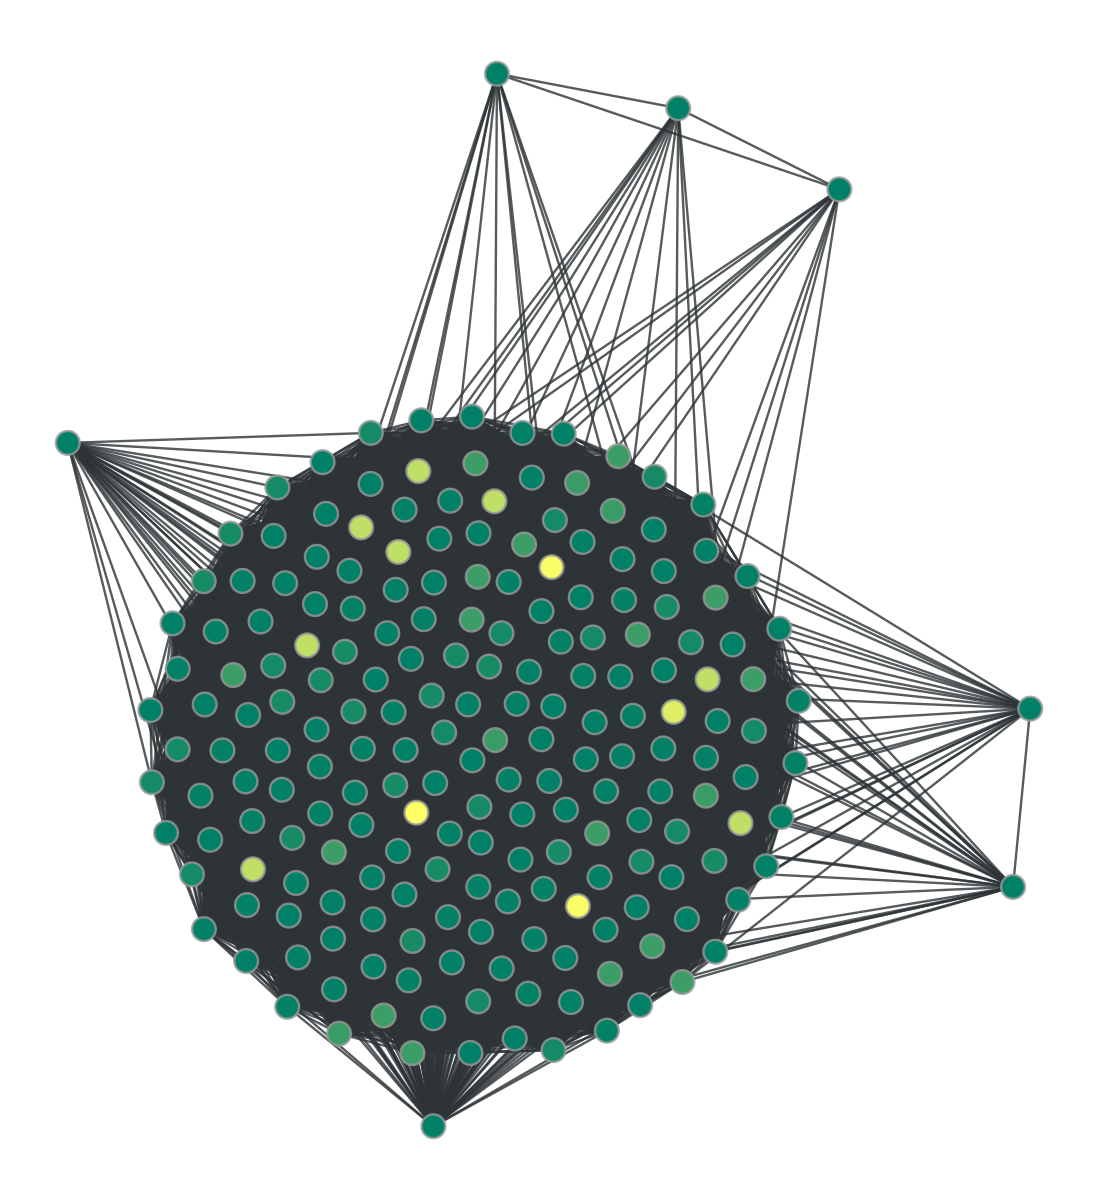

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fac0e98f780, at 0x7fac0e986d30>

In [ ]:
#betweenness centrality 

bv, be = betweenness(gt_2018_univ)
be.a /= be.a.max() / 5 - 132
graph_draw(gt_2018_univ, pos=None, vertex_fill_color=bv, vcmap=matplotlib.cm.summer)

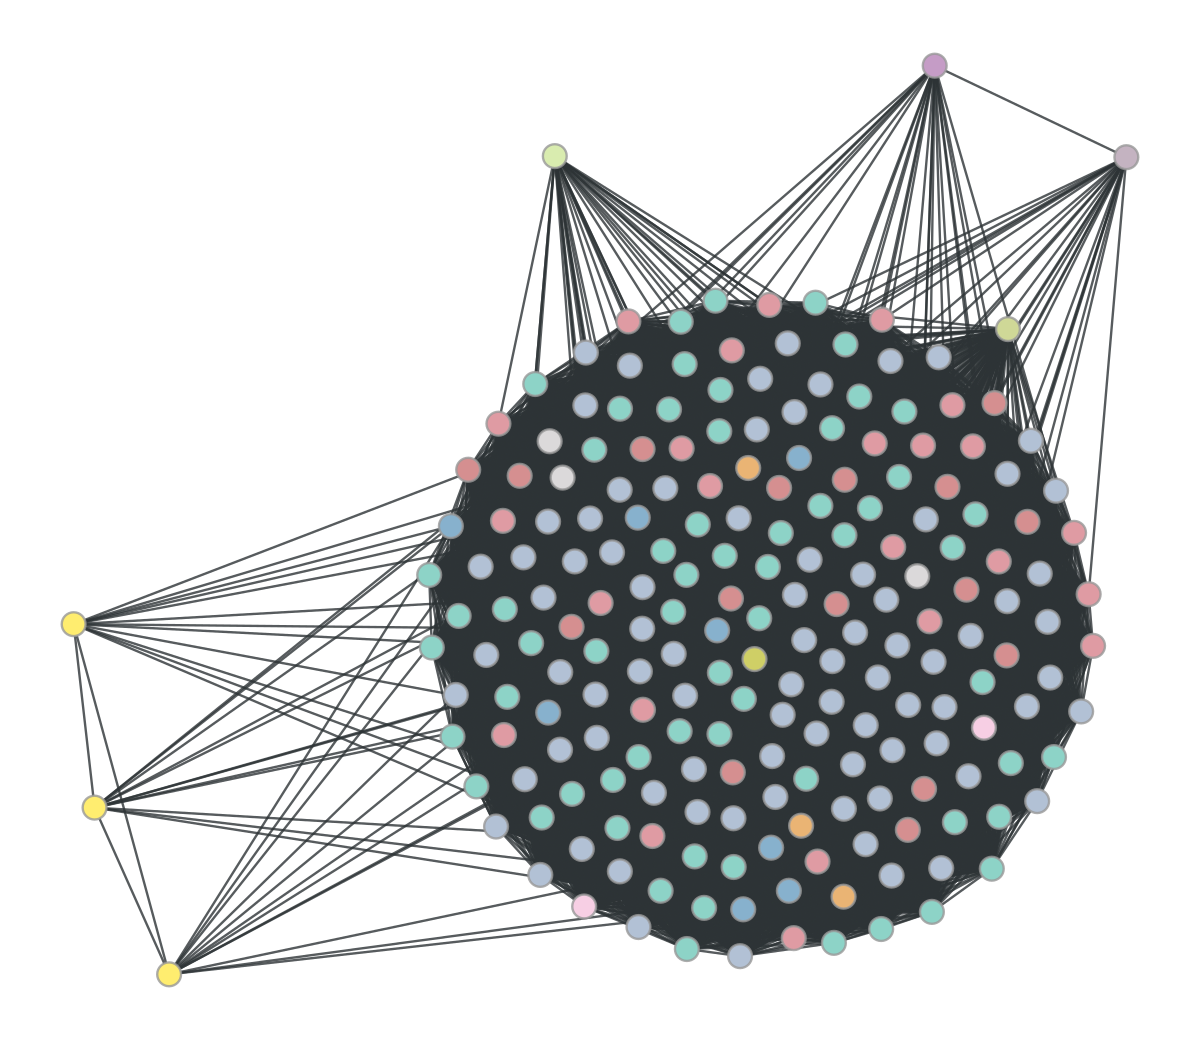

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fac0e98f780, at 0x7fac0e9c1278>

In [ ]:
deg = gt_2018_univ.degree_property_map("total")
gt.graph_draw(gt_2018_univ, vertex_fill_color=deg, vorder=deg)

In [ ]:
dgr_m = print(deg.a)

[199 200 201 199 201 200 200 199 202 199 199 200 200 199 200 199 203 200
 201 199 199 199 199 199 197 200 200 200 200 200 201 202 200 199 199 199
 201 200 201 201 202 199 201 200 199 200 199 203 200 200 200 200 200 199
 199 199 200 200 202 203 205 201 200 200 203 201 200 200 199 201 199 199
 199 199 112 200 200 200 199 200 199 200 200 200 200 202 199 199 201 202
 199 199 199 200 199 200 201 200 199 200 200 199 200 199 200 200 200 200
 202 200 201 200 201 199 200 199 200 197 200 201 199 201 201 199 203 202
 200 200 201 201 199 203 200 199 202 196 200 202 199 199 202 200 200 200
 199 204 200 202 199 199 199 201 200 200 200 200 200 200 201 199 200 202
 199 200 200 197 200 200 200 200 199 200 203 200 200  26 199 201 199 199
 200  25 202 200 201 200 199 202 199 199 200 203 204 200 199 202 196 200
 199  34 199 200 200 204  14  14  14]


In [ ]:
dgr_m

### visualization ver 1 - conversion from networkx graph

In [ ]:
# Eigenvector Centrality as node attributes of the one-mode projection of countries 

eigen_cent_subset_2018 = pd.DataFrame() 
df_eigen_2018['node'] = df_eigen_2018['ctry']
#df_eigen_2018['eigenvec_ctrlty'] = df_eigen_2018['eigenvec_ctrlty']
#df_eigen_2018.loc[df_eigen_2018.eigenvec_ctrlty <0, 'eigenvec_ctrlty'] = 0
eigen_ctrlity_sbset_2018 = df_eigen_2018[["node", "eigenvector_centrality"]]
eigen_ctrlity_node_attr_2018 = eigen_ctrlity_sbset_2018.set_index('node').to_dict('index') # index is always "index"
nx.set_node_attributes(C_2010_2018_eigenvec, eigen_ctrlity_node_attr_2018)

In [ ]:
# Harmonic Centrality as node attributes of the one-mode projection of countries 

harmnic_cent_subset_2018 = pd.DataFrame() 
df_harmnic_2018['node'] = df_harmnic_2018['ctry']
#df_harmnic_2018['harmonic_ctrlty'] = df_harmnic_2018['harmonic_ctrlty']
#df_harmnic_2018.loc[df_harmnic_2018.harmonic_ctrlty<0, 'harmonic_ctrlty'] = 0
harmnic_ctrlity_sbset_2018 = df_harmnic_2018[["node", "harmonic_centrality"]]
harmnic_ctrlity_node_attr_2018 = harmnic_ctrlity_sbset_2018.set_index('node').to_dict('index') # index is always "index"
nx.set_node_attributes(C_2010_2018_harmnic, harmnic_ctrlity_node_attr_2018)

In [ ]:
# Eigenvector centrality graph-tool 
nx.write_graphml_lxml(C_2010_2018_eigenvec, "mea_eigen_ctrlty_2018.graphml")
gt_eigen_2018 = graph_tool.load_graph("mea_eigen_ctrlty_2018.graphml", fmt='auto', ignore_vp=None, ignore_ep=None, ignore_gp=None)

In [ ]:
# Harmonic centrality graph-tool 
nx.write_graphml_lxml(C_2010_2018_harmnic, "mea_harmnic_ctrlty_2018.graphml")
gt_harmnic_2018 = graph_tool.load_graph("mea_harmnic_ctrlty_2018.graphml", fmt='auto', ignore_vp=None, ignore_ep=None, ignore_gp=None)

In [ ]:
# Eigenvector centrality vertex property map 

vprop_eigen = gt_eigen_2018.new_vertex_property("double")
gt_eigen_2018.vp.eigenvector_centrality = vprop_eigen
vprop_eigen.a = (vprop_eigen.a)
#pos = gt.sfdp_layout(gt_eigen_2018)

pos_eigen = gt.fruchterman_reingold_layout(gt_eigen_2018, n_iter=10)
#pos_eigen = gt.arf_layout(gt_eigen_2018, max_iter=0)

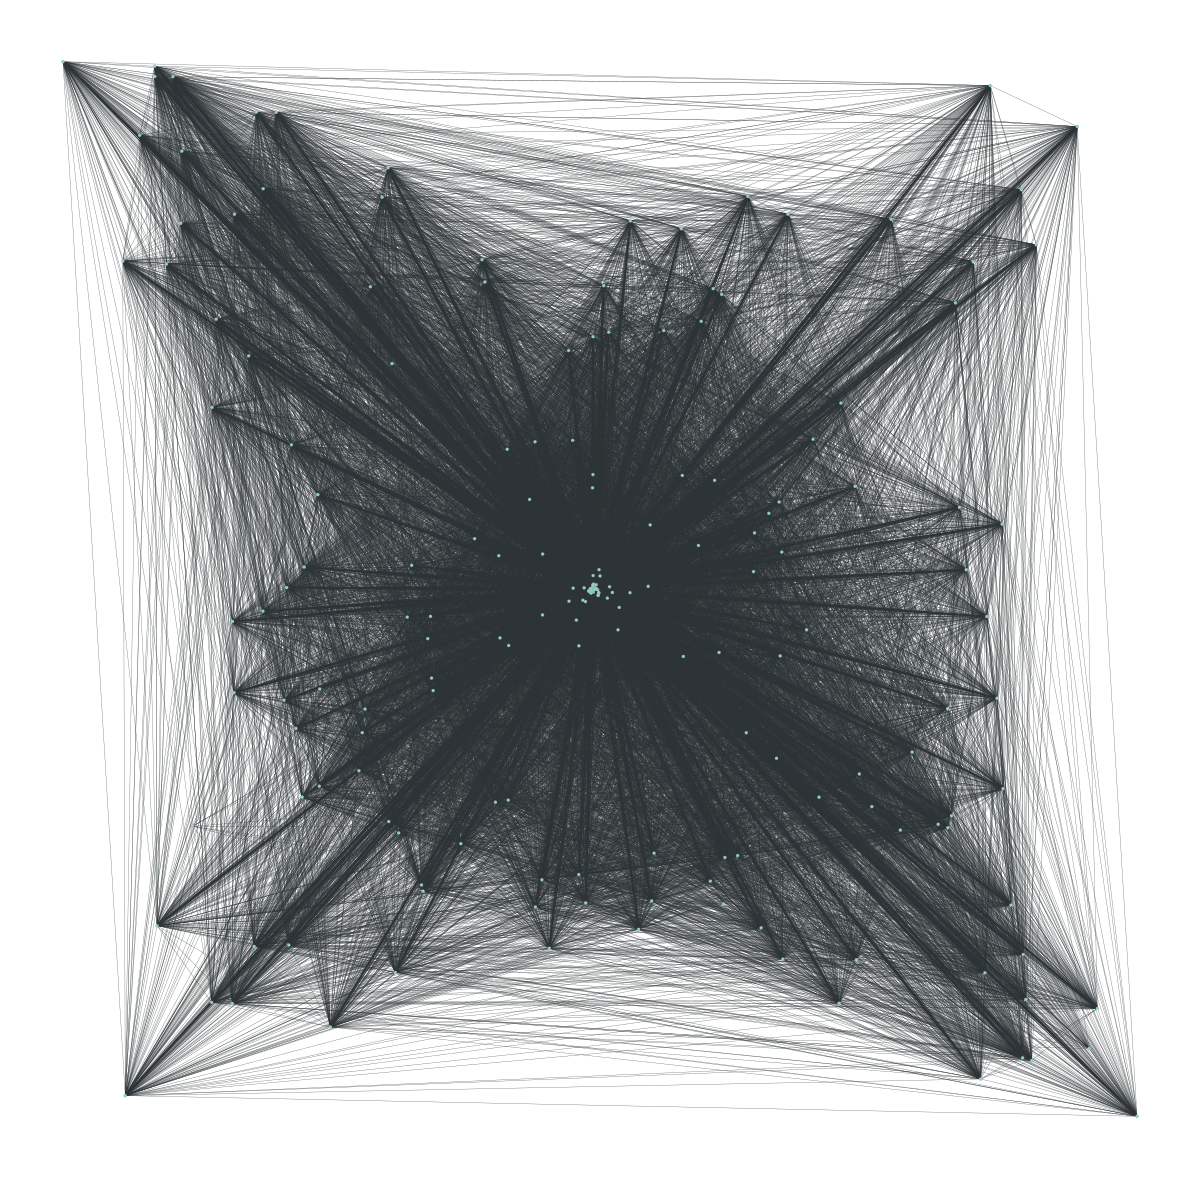

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fac0ddc90f0, at 0x7fac0e1116a0>

In [ ]:
# Eigenvector centrality visual 
gt.graph_draw(gt_eigen_2018, pos=pos_eigen, vertex_fill_color=vprop_eigen, vorder=vprop_eigen, vertex_size=vprop_eigen)

In [ ]:
# Harmonic centrality vertex property map 

vprop_harmnic = gt_harmnic_2018.new_vertex_property("double")
gt_harmnic_2018.vp.eigenvec_ctrlty = vprop_harmnic
vprop_harmnic.a = (vprop_harmnic.a + 4.3)**2.8
#pos = gt.sfdp_layout(gt_harmnic_2018)
pos_harmnic = gt.arf_layout(gt_harmnic_2018, max_iter=0)

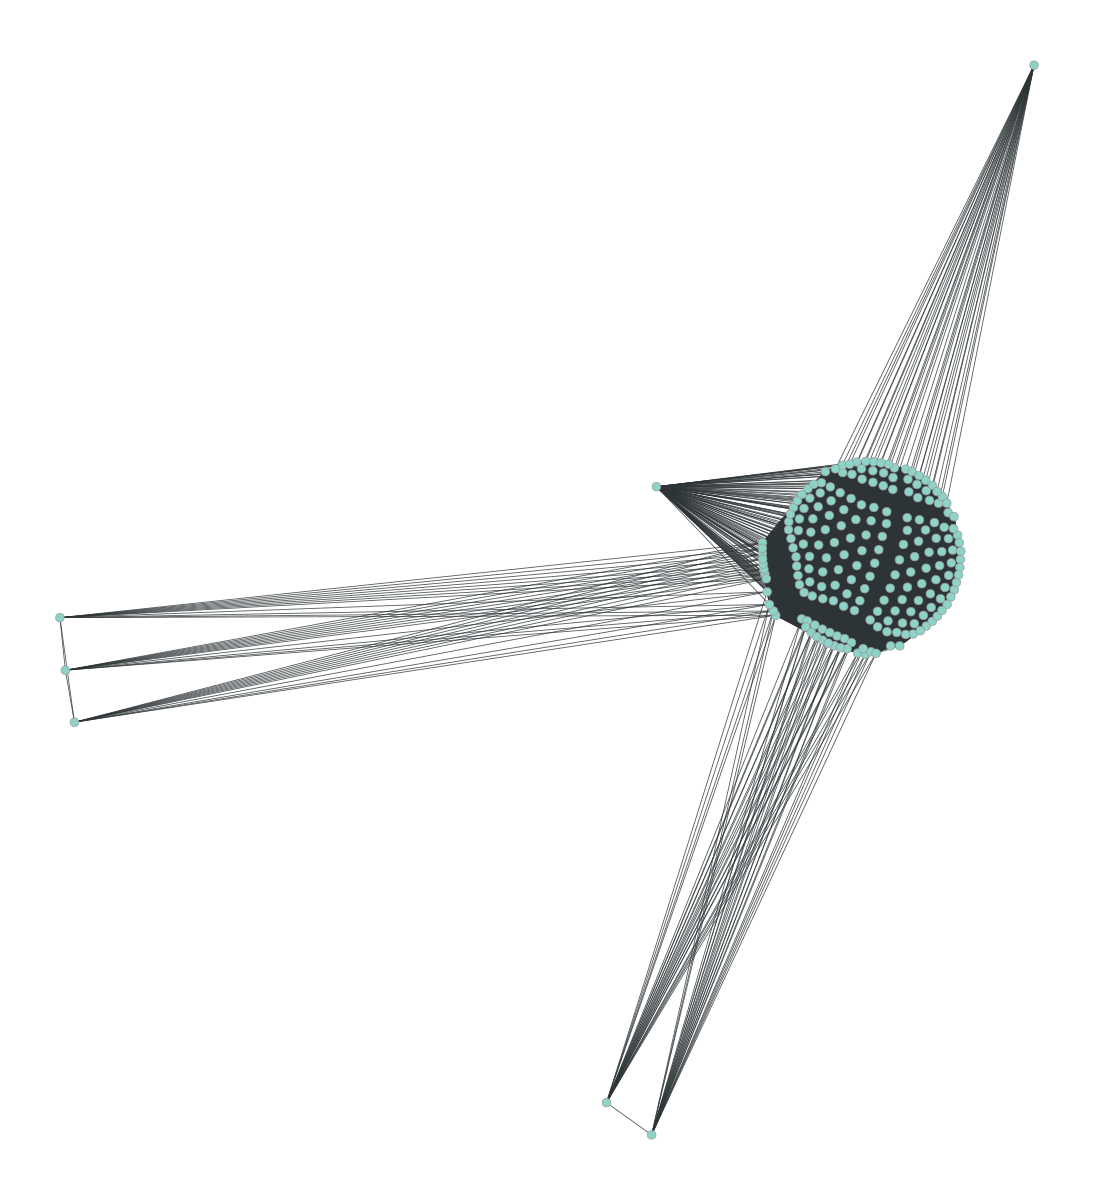

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fac0ddc90f0, at 0x7fac0dd4a898>

In [ ]:
gt.graph_draw(gt_eigen_2018, pos=pos_eigen, vertex_fill_color=vprop_eigen, vorder=vprop_eigen, vertex_size=vprop_eigen)

#### Extra - list values

In [ ]:
vprop = gt_2018.new_vertex_property("double")
gt_2018.vp.eigenvec_ctrlty = vprop


In [ ]:
gt_eigen_2018_new.list_properties()

_graphml_vertex_id     (vertex)  (type: string)
bipartite              (vertex)  (type: int32_t)
_graphml_edge_id       (edge)    (type: string)


In [ ]:
df_eigen_2018['eigenvector_centrality'].describe()

count    204.000000
mean       0.695985
std        0.076350
min        0.085653
25%        0.705327
50%        0.707312
75%        0.707312
max        0.708185
Name: eigenvector_centrality, dtype: float64

In [ ]:
nx.get_node_attributes(G_2000_2008, "bipartite")

{0: 1,
 2: 1,
 3: 1,
 5: 1,
 6: 1,
 8: 1,
 9: 1,
 10: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 40: 1,
 43: 1,
 45: 1,
 46: 1,
 47: 1,
 51: 1,
 52: 1,
 53: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1,
 61: 1,
 62: 1,
 63: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 77: 1,
 78: 1,
 79: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 89: 1,
 91: 1,
 94: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 121: 1,
 122: 1,
 123: 1,
 124: 1,
 125: 1,
 126: 1,
 127: 1,
 128: 1,
 129: 1,
 130: 1,
 131: 1,
 133: 1,
 134: 1,
 135: 1,
 136: 1,
 137: 1,
 138: 1,
 139: 1,
 140: 1,
 142: 1,
 143: 1,
 145: 1,
 146: 1,
 147: 1,
 148: 1,
 149: 1,
 150: 1,
 151: 1,
 152: 1,
 153: 1,


In [ ]:
nx.get_node_attributes(C_2010_2018_eigenvec, "eigenvec_ctrlty")

{}

In [ ]:
nx.set_node_attributes(C_2010_2018, eigen_cent_node_attr)

In [ ]:
print(x.a)

[  0.13173171   0.18134665   0.1963962    0.13173171   0.1963962
   0.18134665   0.18134665   0.13173171   0.2031655    0.13173171
   0.13173171   0.18134665   0.18134665   0.13173171   0.18134665
   0.13173171   0.19746217   0.18134665   0.1963962    0.13173171
   0.13173171   0.13173171   0.13173171   0.13173171  -0.04168817
   0.18134665   0.18134665   0.14678126   0.14678126   0.18134665
   0.1963962    0.2031655    0.18134665   0.13173171   0.13173171
   0.13173171   0.15355056   0.18134665   0.1963962    0.1963962
   0.2031655    0.13173171   0.1963962    0.18134665   0.13173171
   0.18134665   0.13173171   0.19746217   0.18134665   0.18134665
   0.18134665   0.18134665   0.14678126   0.13173171   0.13173171
   0.13173171   0.18134665   0.14678126   0.2031655    0.19746217
   0.21928102   0.1963962    0.14678126   0.18134665   0.19746217
   0.1963962    0.18134665   0.18134665   0.13173171   0.1963962
   0.13173171   0.13173171   0.13173171   0.13173171  -7.56082092
   0.18134665

In [ ]:
node_attr

{0: {'bipartite': 1},
 2: {'bipartite': 1},
 3: {'bipartite': 1},
 5: {'bipartite': 1},
 6: {'bipartite': 1},
 8: {'bipartite': 1},
 9: {'bipartite': 1},
 10: {'bipartite': 1},
 13: {'bipartite': 1},
 14: {'bipartite': 1},
 15: {'bipartite': 1},
 16: {'bipartite': 1},
 17: {'bipartite': 1},
 18: {'bipartite': 1},
 19: {'bipartite': 1},
 20: {'bipartite': 1},
 21: {'bipartite': 1},
 22: {'bipartite': 1},
 23: {'bipartite': 1},
 25: {'bipartite': 1},
 26: {'bipartite': 1},
 27: {'bipartite': 1},
 28: {'bipartite': 1},
 29: {'bipartite': 1},
 31: {'bipartite': 1},
 32: {'bipartite': 1},
 33: {'bipartite': 1},
 34: {'bipartite': 1},
 35: {'bipartite': 1},
 36: {'bipartite': 1},
 37: {'bipartite': 1},
 38: {'bipartite': 1},
 40: {'bipartite': 1},
 43: {'bipartite': 1},
 45: {'bipartite': 1},
 46: {'bipartite': 1},
 47: {'bipartite': 1},
 51: {'bipartite': 1},
 52: {'bipartite': 1},
 53: {'bipartite': 1},
 55: {'bipartite': 1},
 56: {'bipartite': 1},
 57: {'bipartite': 1},
 58: {'bipartite':

In [ ]:
C_2010_2018_eigenvec

{0: {'eigenvec_ctrlty': 0.12236147239999973},
 2: {'eigenvec_ctrlty': 0.14835778099366423},
 3: {'eigenvec_ctrlty': 0.15624387252375468},
 5: {'eigenvec_ctrlty': 0.12236147239999973},
 6: {'eigenvec_ctrlty': 0.15624387252375468},
 8: {'eigenvec_ctrlty': 0.14835778099366423},
 9: {'eigenvec_ctrlty': 0.14835778099366423},
 10: {'eigenvec_ctrlty': 0.12236147239999973},
 13: {'eigenvec_ctrlty': 0.15979101437541438},
 14: {'eigenvec_ctrlty': 0.12236147239999973},
 15: {'eigenvec_ctrlty': 0.12236147239999973},
 16: {'eigenvec_ctrlty': 0.14835778099366423},
 17: {'eigenvec_ctrlty': 0.14835778099366423},
 18: {'eigenvec_ctrlty': 0.12236147239999973},
 19: {'eigenvec_ctrlty': 0.14835778099366423},
 20: {'eigenvec_ctrlty': 0.12236147239999973},
 21: {'eigenvec_ctrlty': 0.14835778099366423},
 22: {'eigenvec_ctrlty': 0.14835778099366423},
 23: {'eigenvec_ctrlty': 0.15624387252375468},
 25: {'eigenvec_ctrlty': 0.12236147239999973},
 26: {'eigenvec_ctrlty': 0.12236147239999973},
 27: {'eigenvec_ctrl

In [ ]:
df_eigen_centrality

ctry  eigenvector_centrality  stad_eigenvector  year  stad_eigenvec_hund
0      79                0.071281          0.208876  2009           20.887566
1      13                0.071220          0.203431  2009           20.343108
2      38                0.071220          0.203431  2009           20.343108
3      55                0.071220          0.203431  2009           20.343108
4      77                0.071220          0.203431  2009           20.343108
..    ...                     ...               ...   ...                 ...
202   221                0.008919         -5.484200  2019         -548.420028
203   227                0.008565         -5.516666  2019         -551.666594
204   301                0.004305         -5.907840  2019         -590.783999
205   302                0.004305         -5.907840  2019         -590.783999
206   303                0.004305         -5.907840  2019         -590.783999

[1030 rows x 5 columns]

In [ ]:
G_2010_2018

In [ ]:
g = Graph()
g.add_vertex(100)

<generator object Graph.add_vertex.<locals>.<genexpr> at 0x7ff2c0fcdc50>

In [ ]:
vprop_vint = g.new_vertex_property("vector<int>")         # Vector of ints
v = g.vertex(40)
vprop_vint[v] = [1, 3, 42, 54]

In [ ]:
for s,t in zip(randint(0, 100, 100), randint(0, 100, 100)):
    g.add_edge(g.vertex(s), g.vertex(t))

In [ ]:
eprop_dict = g.new_edge_property("object")                # Arbitrary Python object.
e = g.edges().next()
eprop_dict[e] = {"foo": "bar", "gnu": 42}  

In [ ]:
type(eprop_dict.a)

NoneType

In [ ]:
vprop_vint = g.new_vertex_property("vector<int>")         # Vector of ints
v = g.vertex(40)
vprop_vint[v] = [1, 3, 42, 54]

In [ ]:
vprop_vint = g.new_vertex_property("vector<int>")         # Vector of ints
v = g.vertex(40)
vprop_vint[v] = [1, 3, 42, 54]

In [ ]:
G3 = graph_tool.generation.price_network(10**6, m=3, c=3, gamma=1, directed=True, seed_graph=None)
vsum = gt.incident_edges_op(G3, "in", "sum", G3.edge_index) #https://graph-tool.skewed.de/static/doc/graph_tool.html?highlight=graph_tool.edgepropertymap#graph_tool.EdgePropertyMap 
frequency_3 = vsum.a
r3_freq_3_list = frequency_3.tolist()

##### graph-tool install

In [ ]:
# https://colab.research.google.com/github/count0/colab-gt/blob/master/colab-gt.ipynb#scrollTo=6km1lWMF2kAm

!apt-get install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-cairo python3-matplotlib

Executing: /tmp/apt-key-gpghome.OLgTrWeEpk/gpg.1.sh --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://downloads.skewed.de/apt bionic In

In [ ]:
#replace values  https://stackoverflow.com/questions/21608228/conditional-replace-pandas 
df_eigen_2008.loc[df_eigen_2008.my_channel > 20000, 'my_channel'] = 0
df_eigen_2011.loc[df_eigen_2013.my_channel > 20000, 'my_channel'] = 0
df_eigen_2013.loc[df_eigen_2013.my_channel > 20000, 'my_channel'] = 0
df_eigen_2015.loc[df_eigen_2015.my_channel > 20000, 'my_channel'] = 0
df_eigen_2018.loc[df_eigen_2018.my_channel > 20000, 'my_channel'] = 0


AttributeError: ignored